- Data Analysis steps
   - create a problem state
   - identify the data you want to analyse
   - explore and clean the dataset
   - analyse the data to get useful insughts
   - present the data in terms of reports or dashboards using visualization

- Research Questions
  - factors affecting reservation and cancellation
  - how to make reservation and cancellation
  - how hotels will be assisted in making pricing and promotion decisions

- Hypothesis
   - more cancellations when prices are higher
   - longer waiting list leads to frequent cancellation
   - majority clients come from offline trave agents fore their reservation


### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### load the dataset

In [2]:
df=pd.read_csv('hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


### Exploratory Data Analysis and Data Cleaning

In [3]:
df.shape

(119390, 36)

In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# convert dates from string formats to date time format
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [8]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [9]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
df.drop(columns=['agent','company'], inplace=True)
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
df.shape

(118898, 34)

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


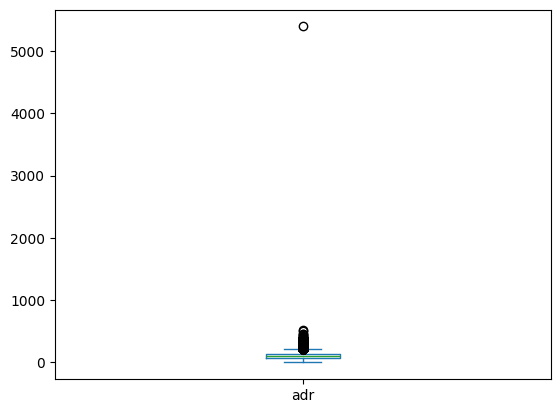

In [15]:
df['adr'].plot(kind='box')
plt.show()

In [16]:
df=df[df['adr']<5000]

### Data Analysis and Visualization

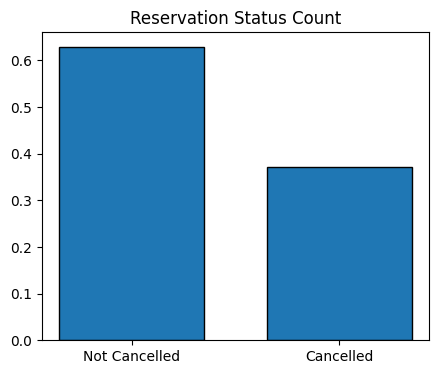

In [17]:
cancelled_perc=df['is_canceled'].value_counts(normalize=True)   # gives precentage
cancelled_perc

plt.figure(figsize=(5,4))
plt.title("Reservation Status Count")
plt.bar(["Not Cancelled", "Cancelled"], df['is_canceled'].value_counts(), edgecolor='k', width=0.7)
plt.show()

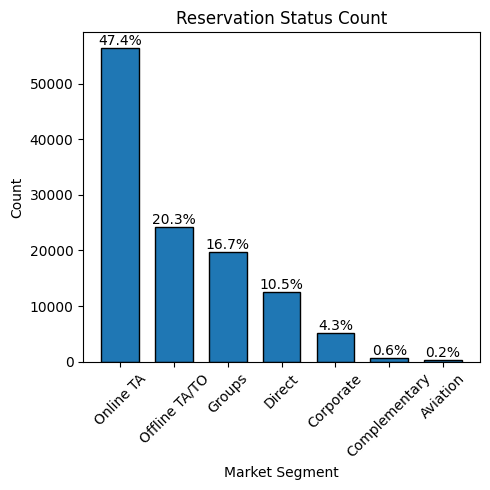

In [18]:
# Get the value counts for the market segment
market_segment_counts = df['market_segment'].value_counts()

# Calculate percentages
total = market_segment_counts.sum()
percentages = (market_segment_counts / total) * 100

# Plot the bar chart
plt.figure(figsize=(5, 5))
plt.title("Reservation Status Count")
bars = plt.bar(market_segment_counts.index, market_segment_counts.values, edgecolor='k', width=0.7)

# Add percentage labels on top of the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2,  # Center of the bar
             bar.get_height() + 1,              # Slightly above the bar
             f'{percentage:.1f}%',             # Percentage label
             ha='center', va='bottom')         # Center alignment

# Formatting
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel("Market Segment")
plt.ylabel("Count")
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

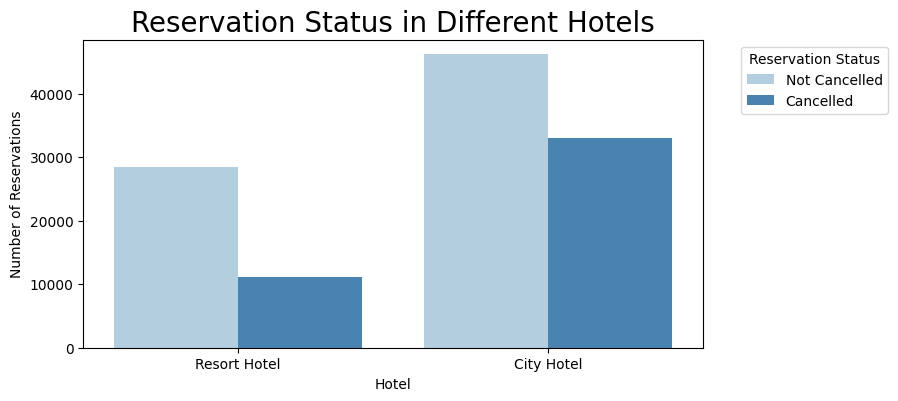

In [19]:
# Plot
plt.figure(figsize=(8, 4))
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')
ax1.legend(title='Reservation Status', labels=['Not Cancelled', 'Cancelled'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Reservation Status in Different Hotels", size=20)
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')
plt.show()

In [20]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [21]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [22]:
resort_hotel= resort_hotel.groupby('reservation_status_date')[['adr']].mean()       # adr= average daily rate
city_hotel= city_hotel.groupby('reservation_status_date')[['adr']].mean()

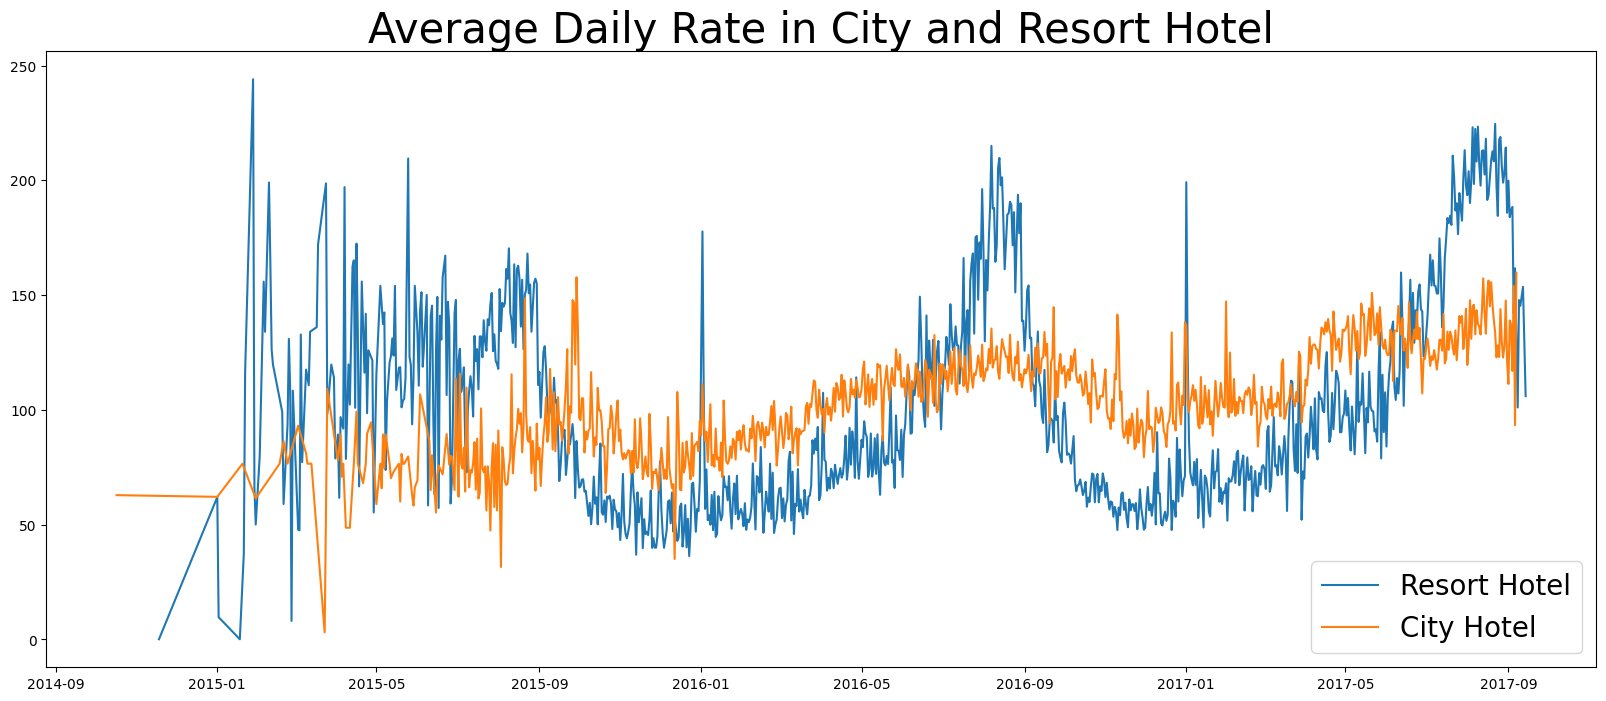

In [23]:
plt.figure(figsize=(20,8))
plt.title("Average Daily Rate in City and Resort Hotel", fontsize=30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel')
plt.legend(fontsize=20)
plt.show()

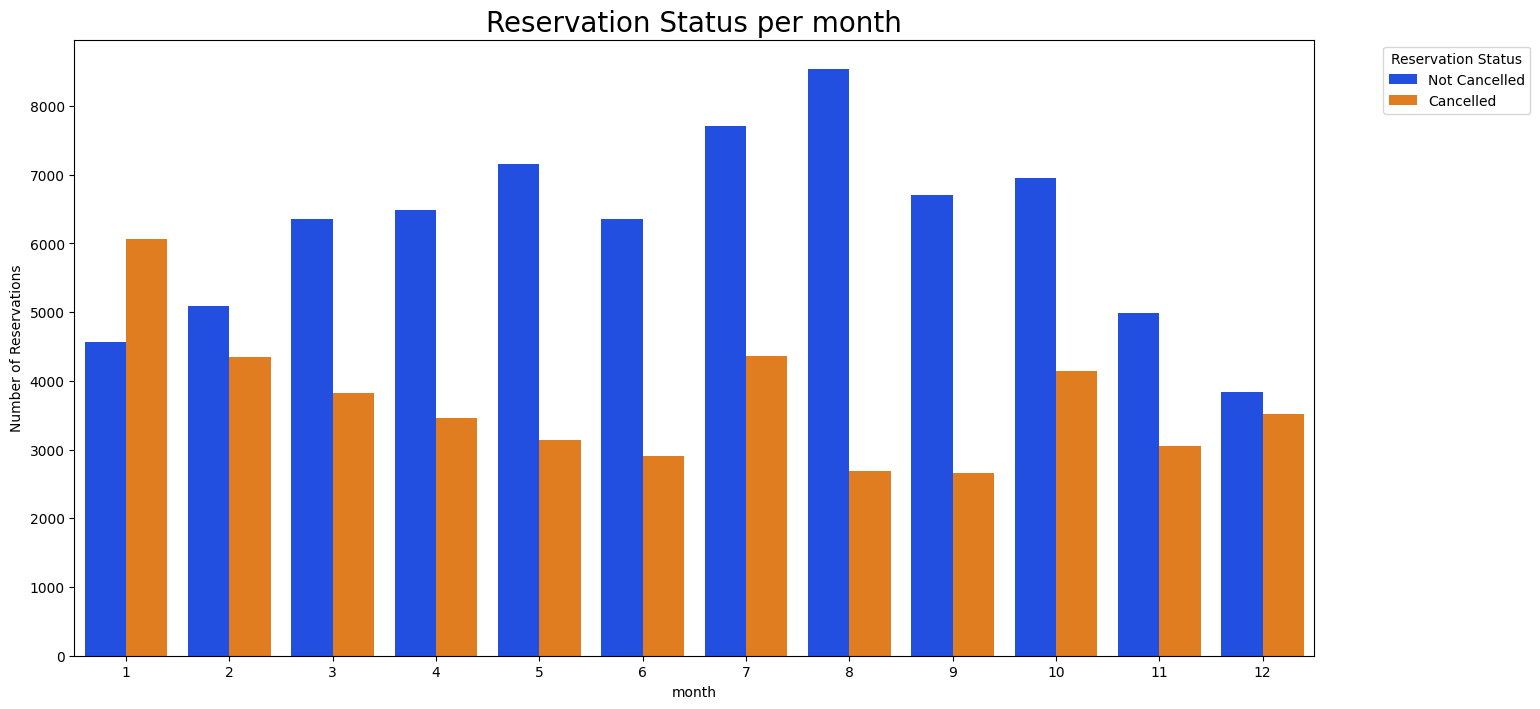

In [24]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16, 8))
ax1 = sns.countplot(x='month', hue='is_canceled', data=df, palette='bright')
ax1.legend(title='Reservation Status', labels=['Not Cancelled', 'Cancelled'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Reservation Status per month", size=20)
plt.xlabel('month')
plt.ylabel('Number of Reservations')
plt.show()

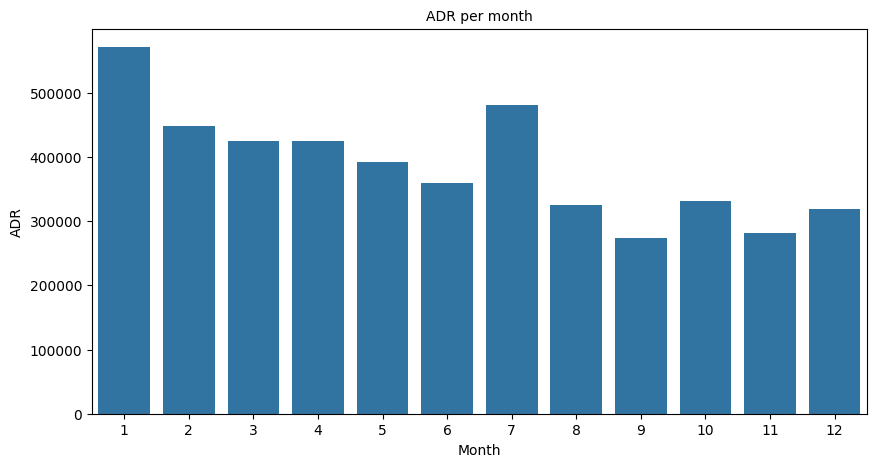

In [25]:
plt.figure(figsize=(10, 5))
plt.title("ADR per month", fontsize=10)

# Grouping data and resetting index
grouped_data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()

# Corrected barplot
sns.barplot(x='month', y='adr', data=grouped_data)

# Remove the legend call, as it's unnecessary here
plt.xlabel("Month", fontsize=10)
plt.ylabel("ADR", fontsize=10)
plt.show()


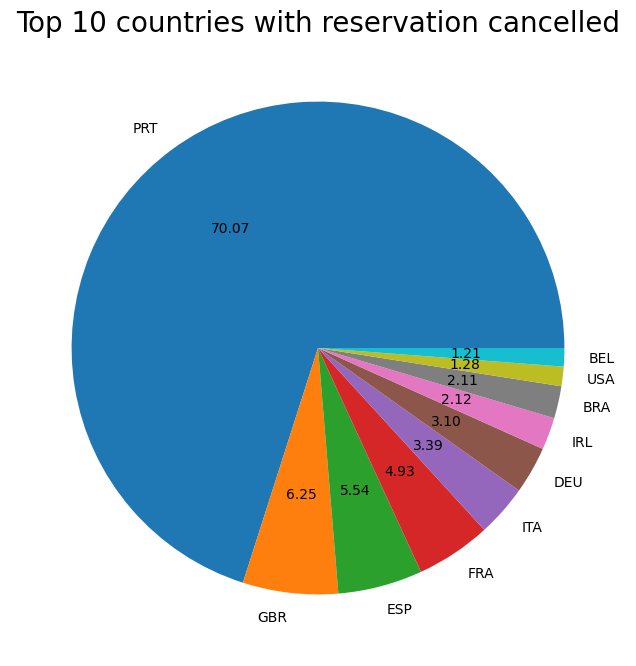

In [26]:
cancelled_data=df[df['is_canceled']==1]
top_10_country=cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title("Top 10 countries with reservation cancelled", size=20)
plt.pie(top_10_country, autopct='%.2f', labels=top_10_country.index)
plt.show()

In [27]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [28]:
# percentage count
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [29]:
cancelled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

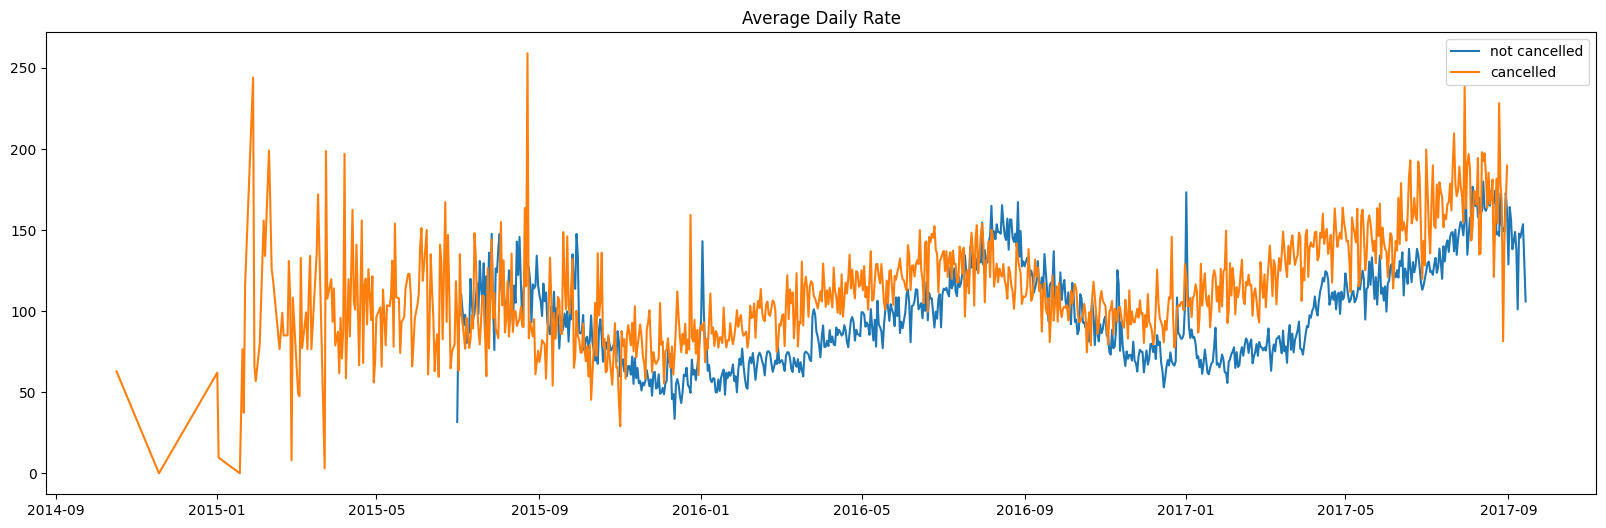

In [30]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_data=df[df['is_canceled']==0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(20, 6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='cancelled')
plt.legend()
plt.show()

In [31]:
cancelled_df_adr = cancelled_df_adr[
    (cancelled_df_adr['reservation_status_date'] > '2016') & 
    (cancelled_df_adr['reservation_status_date'] < '2017-09')
]

not_cancelled_df_adr = not_cancelled_df_adr[
    (not_cancelled_df_adr['reservation_status_date'] > '2016') & 
    (not_cancelled_df_adr['reservation_status_date'] < '2017-09')
]


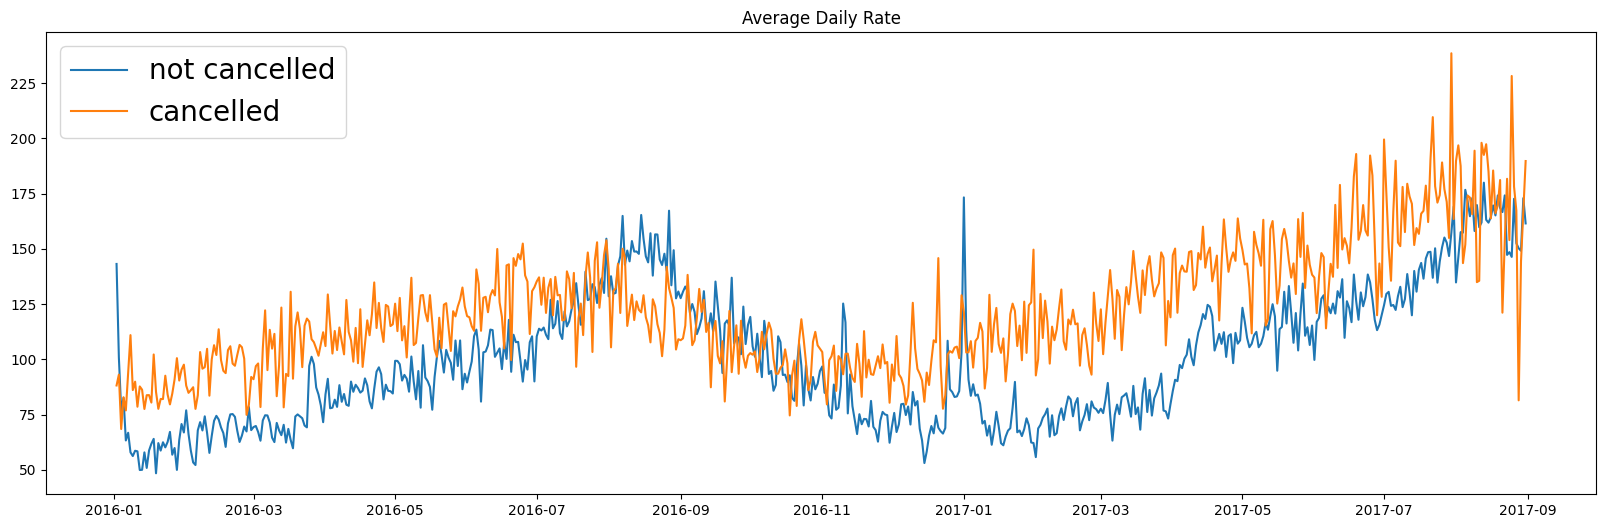

In [32]:
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='cancelled')
plt.legend(fontsize=20)
plt.show()


### Visualizing Cancellations by Market Segment

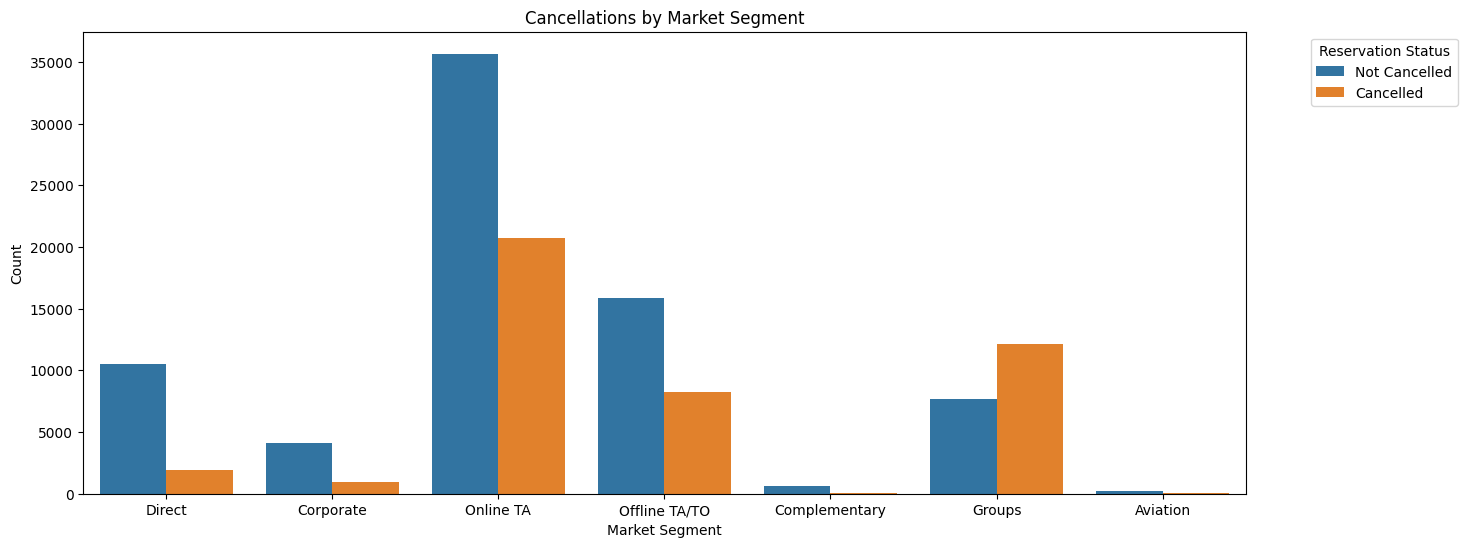

In [33]:
plt.figure(figsize=(15,6))


ax1 = sns.countplot(data=df, x='market_segment', hue='is_canceled')
ax1.legend(title='Reservation Status', labels=['Not Cancelled', 'Cancelled'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Cancellations by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.show()


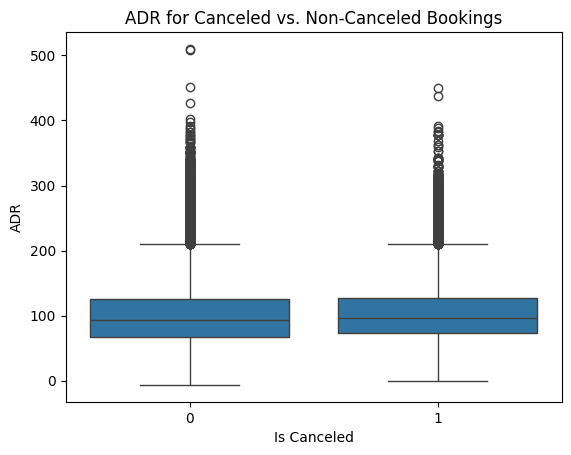

In [34]:
sns.boxplot(data=df, x='is_canceled', y='adr')
plt.title('ADR for Canceled vs. Non-Canceled Bookings')
plt.xlabel('Is Canceled')
plt.ylabel('ADR')
plt.show()


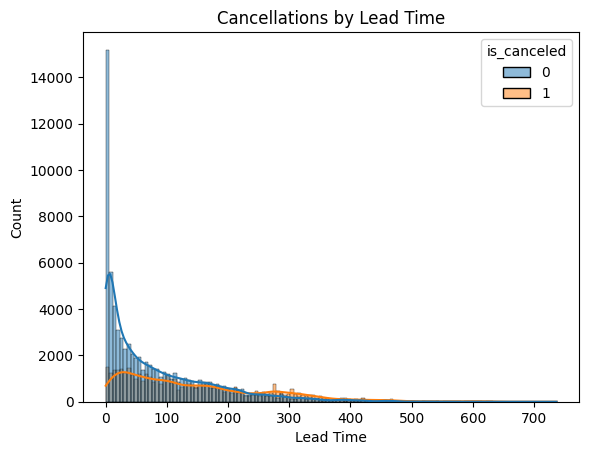

In [35]:
sns.histplot(data=df, x='lead_time', hue='is_canceled', kde=True)
plt.title('Cancellations by Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Count')
plt.show()


### Stacked Bar Chart to Show Room Type Mismatches

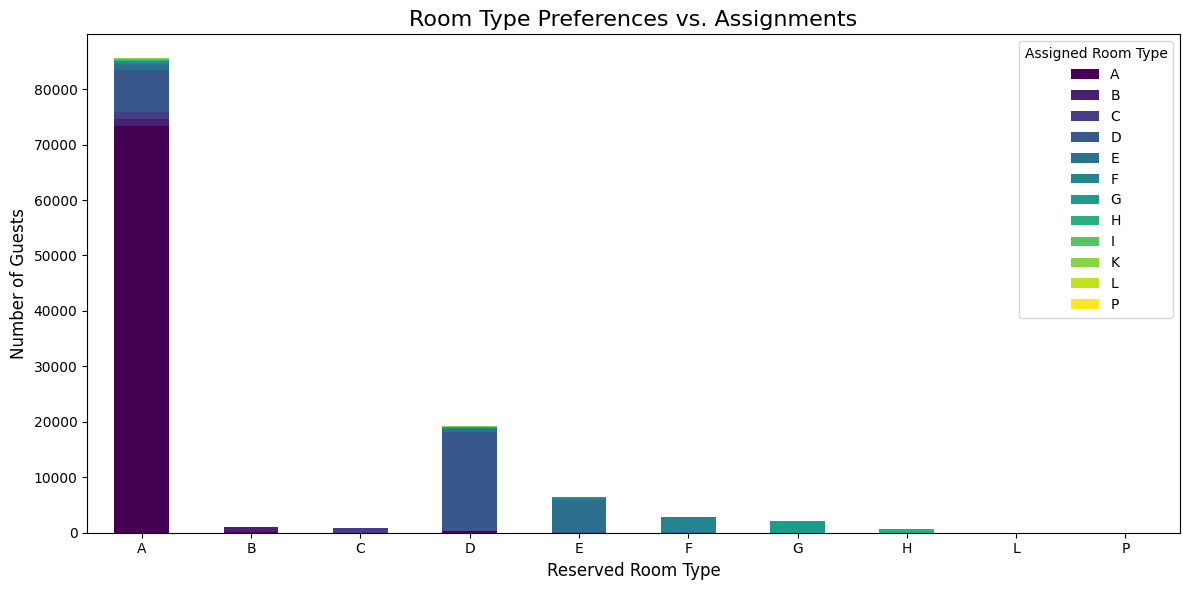

In [36]:
# Create a crosstab to compare reserved and assigned room types
room_mismatch = pd.crosstab(df['reserved_room_type'], df['assigned_room_type'])

# Plot the crosstab as a stacked bar chart
room_mismatch.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Add titles and labels
plt.title('Room Type Preferences vs. Assignments', fontsize=16)
plt.xlabel('Reserved Room Type', fontsize=12)
plt.ylabel('Number of Guests', fontsize=12)
plt.legend(title='Assigned Room Type')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

### Heatmap to Show Room Type Mismatches

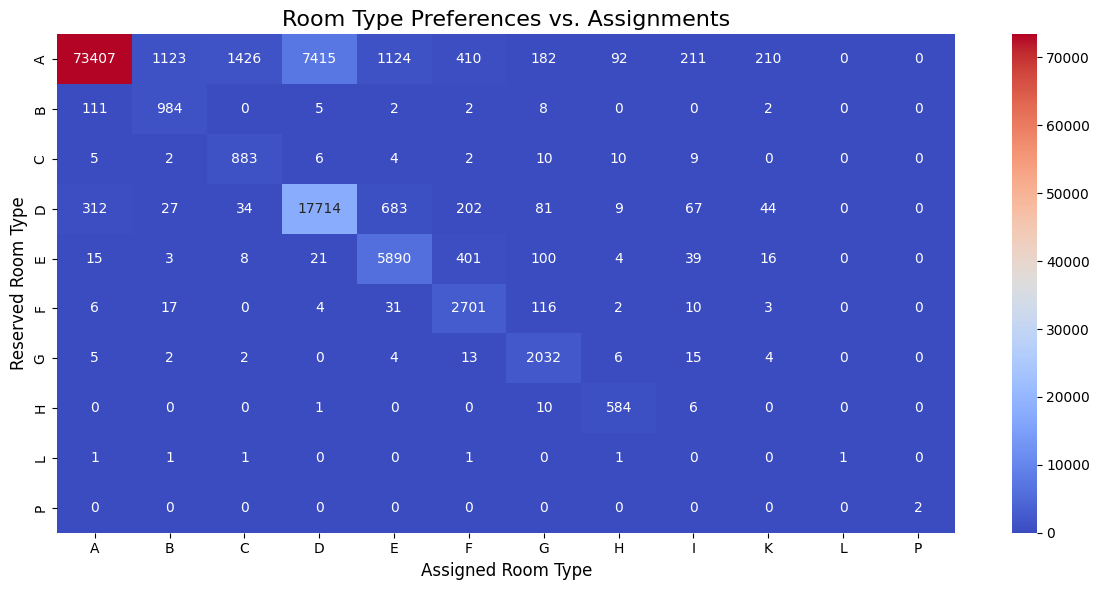

In [37]:
# Plot a heatmap of the crosstab
plt.figure(figsize=(12, 6))
sns.heatmap(room_mismatch, annot=True, fmt="d", cmap="coolwarm", cbar=True)

# Add titles and labels
plt.title('Room Type Preferences vs. Assignments', fontsize=16)
plt.xlabel('Assigned Room Type', fontsize=12)
plt.ylabel('Reserved Room Type', fontsize=12)
plt.tight_layout()

# Show the heatmap
plt.show()


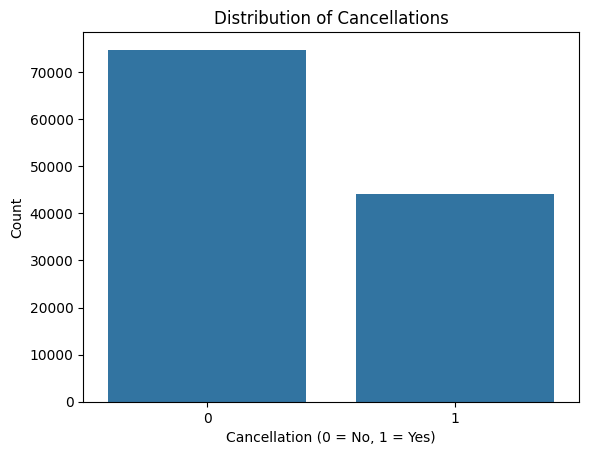

In [38]:
sns.countplot(x='is_canceled', data=df)
plt.title('Distribution of Cancellations')
plt.xlabel('Cancellation (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


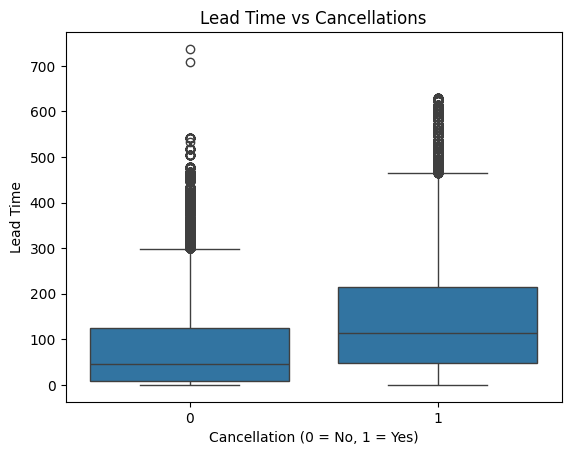

In [39]:
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time vs Cancellations')
plt.xlabel('Cancellation (0 = No, 1 = Yes)')
plt.ylabel('Lead Time')
plt.show()


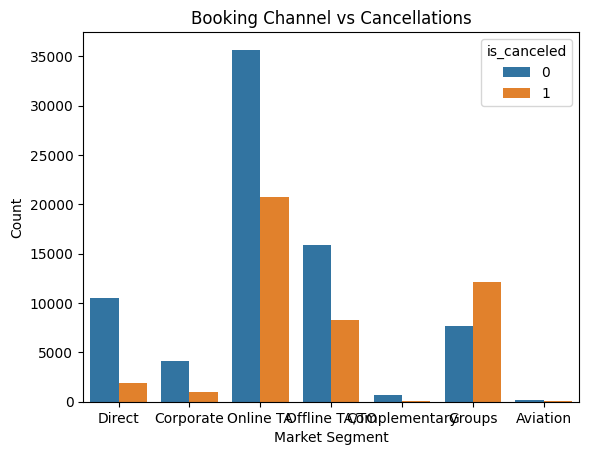

In [40]:
sns.countplot(x='market_segment', hue='is_canceled', data=df)
plt.title('Booking Channel vs Cancellations')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.show()


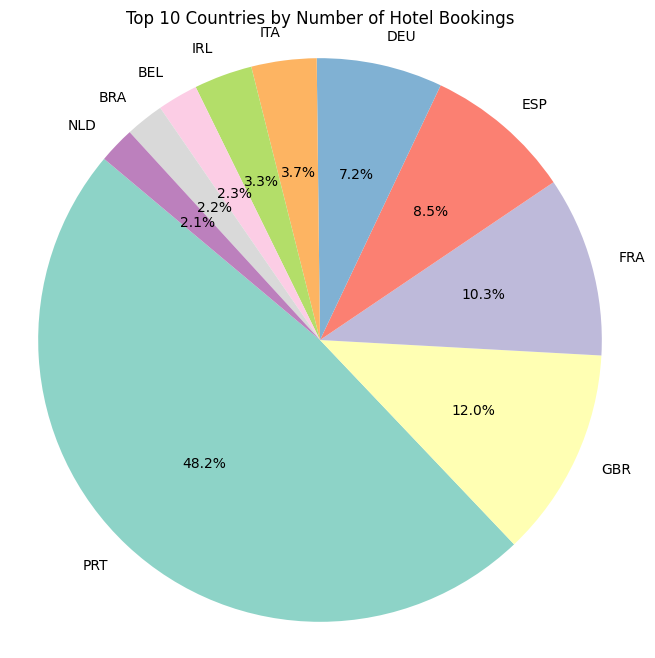

In [41]:
# Count the number of bookings per country
country_counts = df['country'].value_counts()

# Select the top 10 countries
top_10_countries = country_counts.head(10)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3", 10))
plt.title('Top 10 Countries by Number of Hotel Bookings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


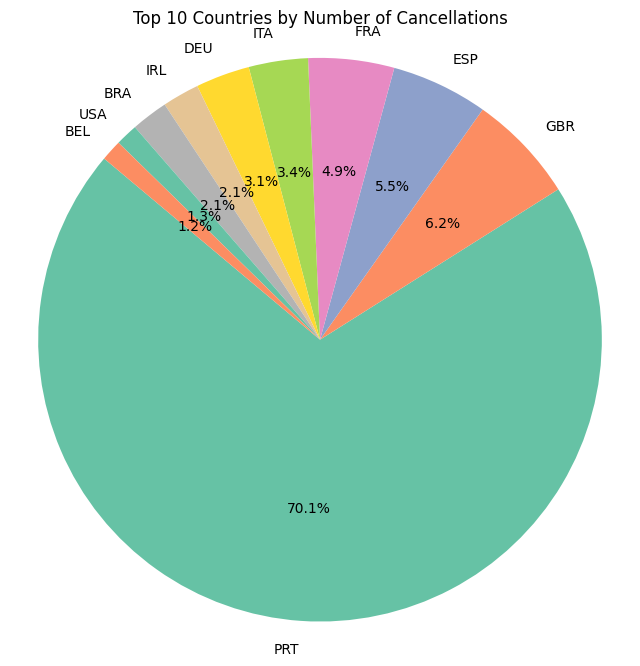

In [42]:
# Filter the data for cancellations
cancellations = df[df['is_canceled'] == 1]

# Count the number of cancellations per country
cancellation_counts = cancellations['country'].value_counts()

# Select the top 10 countries with the most cancellations
top_10_countries_cancellation = cancellation_counts.head(10)

# Plot the pie chart for cancellations
plt.figure(figsize=(8, 8))
plt.pie(top_10_countries_cancellation, labels=top_10_countries_cancellation.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", 10))
plt.title('Top 10 Countries by Number of Cancellations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


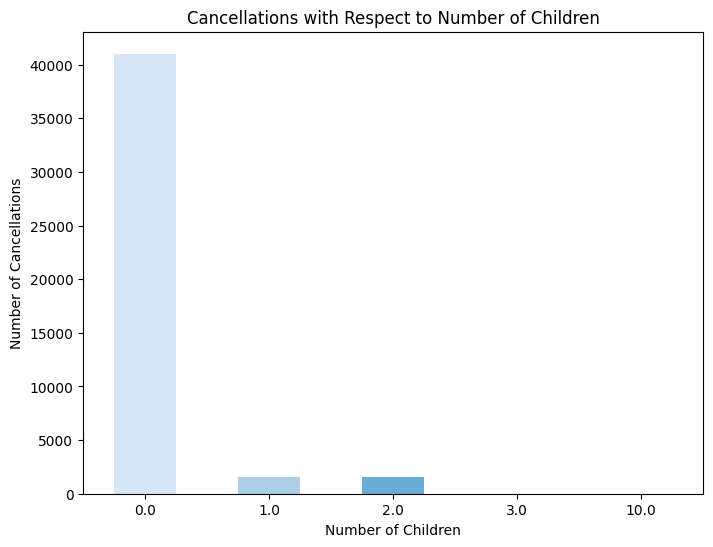

In [43]:
# Group the data by the number of children and calculate cancellations
cancellation_by_children = cancellations.groupby('children')['is_canceled'].sum()

# Plot the bar chart
plt.figure(figsize=(8, 6))
cancellation_by_children.plot(kind='bar', color=sns.color_palette("Blues", 5))
plt.title('Cancellations with Respect to Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=0)
plt.show()


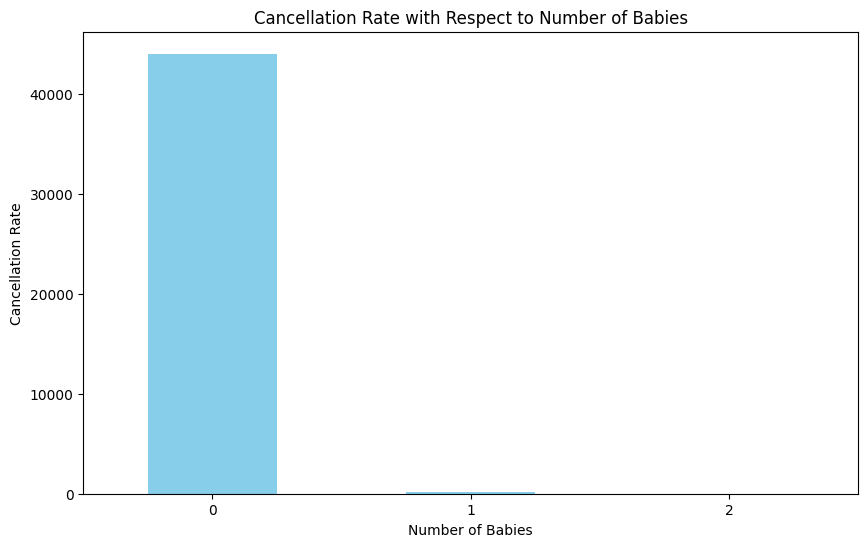

In [48]:
# Group the data by the number of babies and calculate the cancellation rate
cancellation_by_babies = cancellations.groupby('babies')['is_canceled'].sum()

# Plot the bar chart for cancellations with respect to the number of babies
plt.figure(figsize=(10, 6))
cancellation_by_babies.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate with Respect to Number of Babies')
plt.xlabel('Number of Babies')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=0)
plt.show()
